# Linear Coupling

## Hamiltonian with Longitudinal Vector Potentials

Let us recall the exact Hamiltonian has the form:
$$K\left(x, p_x, y, p_y, z, \delta,s\right)=-\left(1+\frac{x}{\rho}\right)\sqrt{(1+\delta)^2-p_x^2-p_y^2} 
-e\frac{A_s}{p_0}\left(1+\frac{x}{\rho}\right)
$$

and take the following special cases or approximations:
* Mono-energy, $\delta=0$
* Straight section, $\rho=\infty$
* Paraxial Approximation $p_x\ll 1$ and $p_y\ll 1$.
* Consider the skew Quadrupoles

<IPython.core.display.Javascript object>


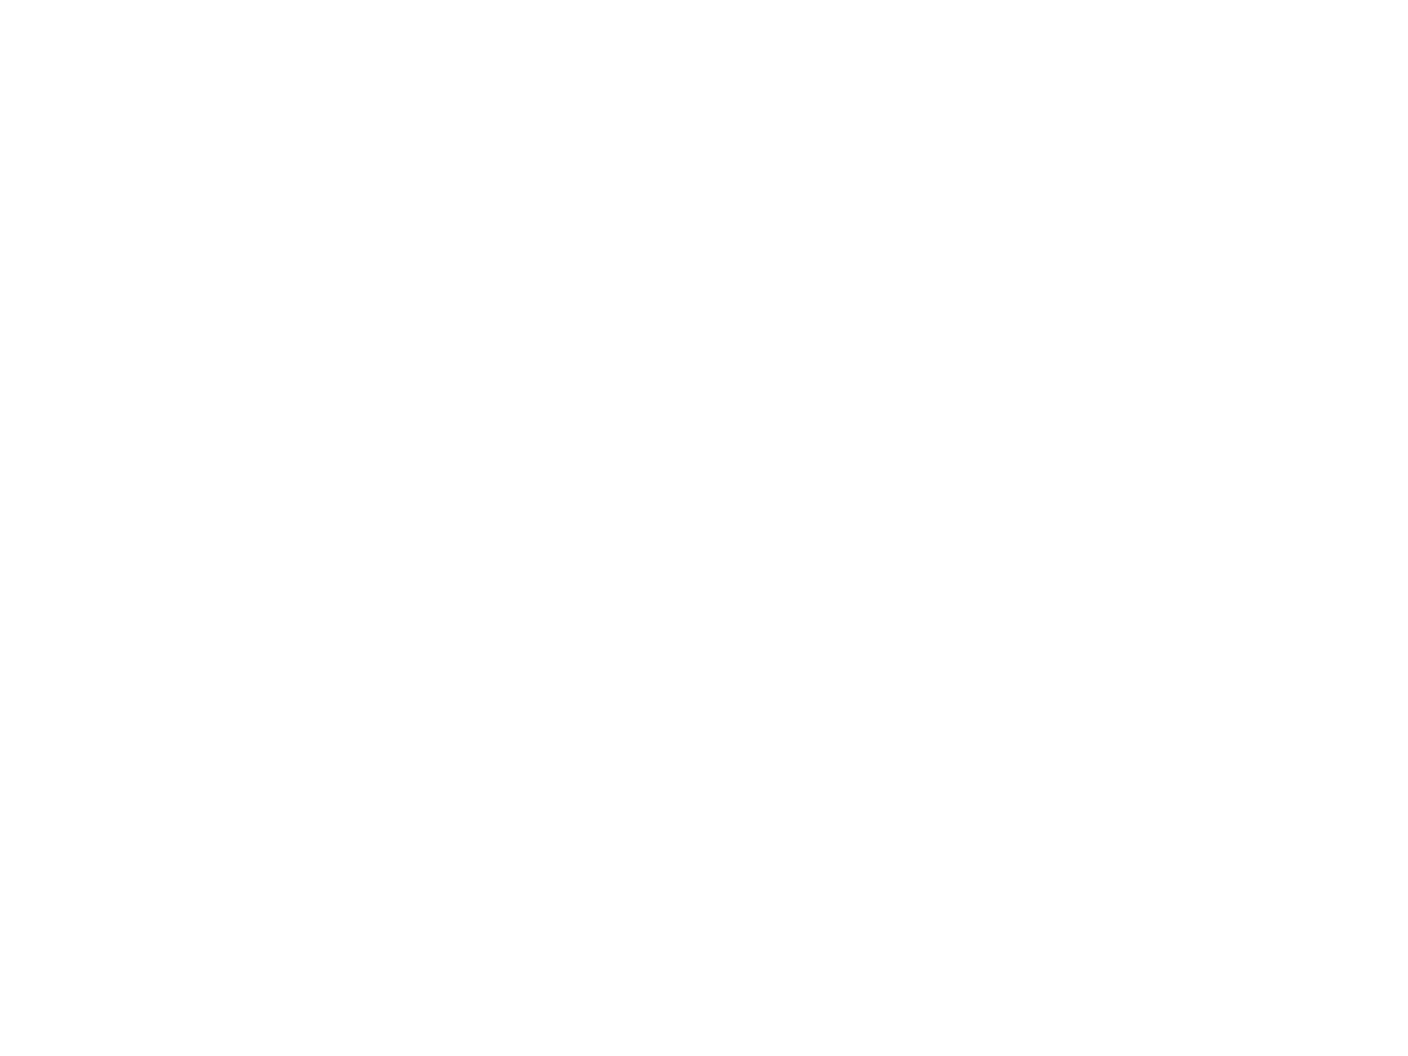

In [1]:
from map2D import map2D
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import animation
#from IPython.display import HTML
%matplotlib notebook

tunex=0.283
dtune=0.01

pxs=0.0005*np.arange(10)
pxps=np.zeros_like(pxs)
#pxs=0.005*np.cos(np.linspace(0,np.pi, 10))
#pxps=0.005*np.sin(np.linspace(0,np.pi, 10))

particles=np.vstack([pxs,pxps])
xpx=map2D(npart=10, twiss=[1,0], twiss_beam=[1,0], tune=tunex, chrom=0.0, espr=0.0,
                  particles=particles)

pys=0.004*np.ones(10)
pyps=np.zeros_like(pys)
particles=np.vstack([pys,pyps])
ypy=map2D(npart=len(pxs), twiss=[1,0], twiss_beam=[1,0],tune=1-tunex+dtune, chrom=0.0, espr=0.0,
          particles=particles, 
          emit=0.1e-6)

avex,avep,sizex,sizep,emit=xpx.statistics()
emitlist=[]
sizelist=[]
avelist=[]
N_turn=1000


def evolve_func(turns, kick_turn_start=0, ks=-0.01,
               ):
    for i in range(turns):
        if i>=kick_turn_start:
            xpx.coor2D[1,:]+=ks*ypy.coor2D[0,:]
            ypy.coor2D[1,:]+=ks*xpx.coor2D[0,:]
        
        xpx.propagate()
        ypy.propagate()
        
        #avex,avep,sizex,sizep,emit=xpx.statistics()
        #avelist.append(avex)
        #sizelist.append(sizex)
        #emitlist.append(emit)
        yield xpx.coor2D, ypy.coor2D
        
evolve=evolve_func(N_turn+2)
    
fig,ax=plt.subplots()
ax.set_xlim([-0.01,0.01])
ax.set_ylim([-0.01,0.01])
xlist=[]
xplist=[]
ylist=[]
yplist=[]


for i in range(N_turn):
    arrx, arry=next(evolve)
    #if np.max(arr)>1: break
    xlist.append(arrx[0])
    xplist.append(arrx[1])
    ylist.append(arry[0])
    yplist.append(arry[1])
xarr=np.vstack(xlist)
xparr=np.vstack(xplist)
yarr=np.vstack(ylist)
yparr=np.vstack(yplist)
ax.plot(xarr,xparr,linestyle='None', marker='.', c='b', markersize=1)
Jx=xarr*xarr+xparr*xparr
Jy=yarr*yarr+yparr*yparr


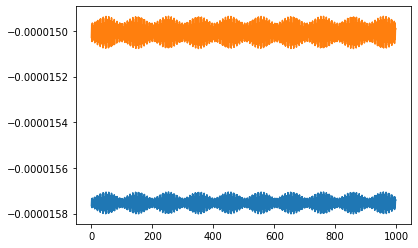

In [2]:
fig,ax=plt.subplots()
#ax.set_xlim([1000,15000])
for i in range(2):
    ax.plot(Jx[:,i+1]-Jy[:,i+1])
